An example of using ANFIS technology

## Membership function

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 31 15:41:58 2014

@author: tim.meggs
"""

from skfuzzy import gaussmf, gbellmf, sigmf

class MemFuncs:
    """Common base class for all employees"""
    
    funcDict = {'gaussmf': gaussmf, 'gbellmf': gbellmf, 'sigmf': sigmf}

    def __init__(self, MFList):
        self.MFList = MFList

    def evaluateMF(self, rowInput):
        if len(rowInput) != len(self.MFList):
            print("Number of variables does not match number of rule sets")
            
        return [
            [
                self.funcDict[
                    self.MFList[i][k][0]
                ](rowInput[i],**self.MFList[i][k][1]) 
                for k in range(len(self.MFList[i]))
            ] 
            for i in range(len(rowInput))
        ]

## Membership function derivative
### Gaussian fuzzy membership function
#### Definition
$$
\mu_{\mu, \sigma}(x)=\exp \left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$
#### Derivatives
$$
\frac{\partial \mu_{\mu, \sigma}(x)}{\partial x} = \mu_{\mu, \sigma}(x)\cdot\frac{\mu-x}{\sigma^2}\\
\frac{\partial \mu_{\mu, \sigma}(x)}{\partial \mu} = \mu_{\mu, \sigma}(x)\cdot\frac{\mu-x}{\sigma^2}\\
\frac{\partial \mu_{\mu, \sigma}(x)}{\partial \sigma} = \mu_{\mu, \sigma}(x)\frac{(x-\mu)^2}{\sigma^3}
$$
#### Graph

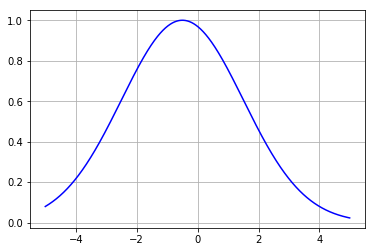

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array(range(-500,500))/100
mean = -0.5
sigma = 2

y = np.exp(-((x - mean)**2.) / (2 * sigma**2.))

plt.plot(x,y,'b')
plt.grid(True)

### Generalized Bell membership function 
#### Definition
$$
\displaystyle \mu_{a,b,c}(x) = \frac{1}{1+\left|\frac{x-c}{a}\right|^{2b}}
$$
#### Derivatives
$$
\frac{\partial \mu_{a,b,c}(x)}{\partial x} = -\frac{1}{\mu_{a,b,c}^2(x)}\left|\frac{x-c}{a}\right|^{2b-2}\frac{2b(c-x)}{a^2}\\
\frac{\partial \mu_{a,b,c}(x)}{\partial c} = -\frac{1}{\mu_{a,b,c}^2(x)}\left|\frac{x-c}{a}\right|^{2b-2}\frac{2b(c-x)}{a^2}\\
\frac{\partial \mu_{a,b,c}(x)}{\partial a} = -\frac{1}{\mu_{a,b,c}^2(x)}\left|\frac{x-c}{a}\right|^{2b}\frac{2b}{a}\\
\frac{\partial \mu_{a,b,c}(x)}{\partial b} = -\frac{1}{\mu_{a,b,c}^2(x)}\left|\frac{x-c}{a}\right|^{2b}\cdot 2\ln\left|\frac{x-c}{a}\right|
$$
#### Graph

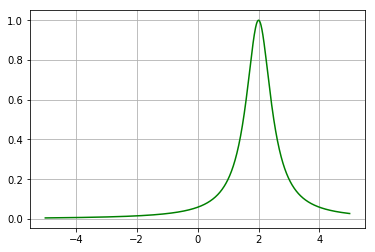

In [15]:
a = 0.5
b = 1
c = 2
y_2 = 1. / (1. + np.abs((x - c) / a) ** (2 * b))
plt.plot(x,y_2,'g')
plt.grid(True)

### Generalized Bell membership function 
#### Definition

$$
\mu_{b,c}(x) = \frac{1}{1+e^{-c(x-b)}}
$$
#### Derivatives
$$
\frac{\partial \mu_{b,c}(x)}{\partial x} = \frac{c\cdot e^{-c(x-b)}}{\mu^2_{b,c}(x)}\\
\frac{\partial \mu_{b,c}(x)}{\partial b} = \frac{-c \cdot e^{-c(x-b)}}{\mu^2_{b,c}(x)}\\
\frac{\partial \mu_{b,c}(x)}{\partial c} = \frac{(x-b)\cdot e^{-c(x-b)}}{\mu^2_{b,c}(x)}
$$
#### Graph

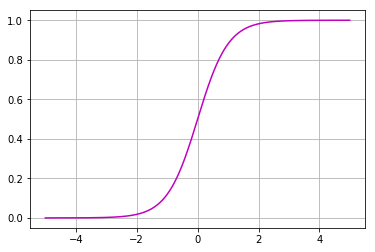

In [18]:
b = 0
c = 2
y_3 = 1. / (1. + np.exp(- c * (x - b)))
plt.plot(x,y_3,'m')
plt.grid(True)

In [19]:
import numpy as np


def partial_dMF(x, mf_definition, partial_parameter):
    """Calculates the partial derivative of a membership function at a point x.
    Parameters
    ------
    Returns
    ------
    """
    mf_name = mf_definition[0]

    if mf_name == 'gaussmf':

        sigma = mf_definition[1]['sigma']
        mean = mf_definition[1]['mean']

        if partial_parameter == 'sigma':
            result = (2./sigma**3) * np.exp(-(((x-mean)**2)/(sigma)**2))*(x-mean)**2
        elif partial_parameter == 'mean':
            result = (2./sigma**2) * np.exp(-(((x-mean)**2)/(sigma)**2))*(x-mean)

    elif mf_name == 'gbellmf':

        a = mf_definition[1]['a']
        b = mf_definition[1]['b']
        c = mf_definition[1]['c']

        if partial_parameter == 'a':
            result = (2. * b * np.power((c-x),2) * np.power(np.absolute((c-x)/a), ((2 * b) - 2))) / \
                (np.power(a, 3) * np.power((np.power(np.absolute((c-x)/a),(2*b)) + 1), 2))
        elif partial_parameter == 'b':
            result = -1 * (2 * np.power(np.absolute((c-x)/a), (2 * b)) * np.log(np.absolute((c-x)/a))) / \
                (np.power((np.power(np.absolute((c-x)/a), (2 * b)) + 1), 2))
        elif partial_parameter == 'c':
            result = (2. * b * (c-x) * np.power(np.absolute((c-x)/a), ((2 * b) - 2))) / \
                (np.power(a, 2) * np.power((np.power(np.absolute((c-x)/a),(2*b)) + 1), 2))

    elif mf_name == 'sigmf':

        b = mf_definition[1]['b']
        c = mf_definition[1]['c']

        if partial_parameter == 'b':
            result = -c * np.exp(c * (b - x)) / \
                np.power(np.exp(c * (b - x))+1, 2)
        elif partial_parameter == 'c':
            result = ((x - b) * np.exp(c * (b - x))) / \
                np.power(np.exp(c*(b-x)) + 1, 2)


    return result